In [1]:
import numpy as np
from matplotlib import pyplot as plt

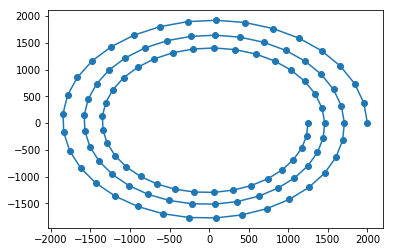

In [29]:
t = np.linspace(0, 3*2*np.pi, 100)
tau = 40
x = np.cos(t) * np.exp(-t/tau)
y = np.sin(t) * np.exp(-t/tau)

x = x * 2000
y = y * 2000

plt.scatter(x,y)
plt.plot(x,y)

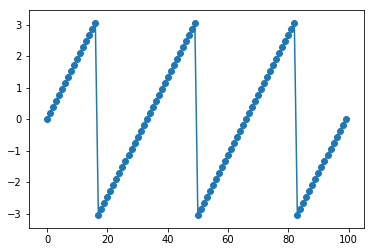

In [3]:
c = np.arctan2(y,x)

plt.plot(c)
plt.scatter(list(range(len(c))),c)

In [4]:
x = 50
y = 30

np.arctan2(y,x)

0.5404195002705842

In [5]:
r= np.array([x,y])

In [6]:
def arrow(r,**kwargs):
    color=kwargs.get("color","blue")
    plt.arrow(0,0,r[0],r[1],color=color)

In [22]:
from ipywidgets import interact

def my_function(r,phi):
    
    absr = r

    x = absr * np.cos(phi)
    y = absr * np.sin(phi)

    q= np.array([x,y])

    #plt.xlim(-100,100)
    #plt.ylim(-100,100)

    #arrow(q)


    angle_accu = 0

    for n in range(13):
        d = 1
        if q[1] >= 0:
            d = -1

        angle_accu -= d*np.arctan(1/2**n)

        tm = np.array([[1,-1/2**n*d],[1/2**n*d,1]])
        q = np.dot(tm,q)
        #arrow(q,color="red")

    print(phi)
    print(angle_accu)
    print("error in percent {:3.3f}".format((angle_accu-phi)/phi*100))



# create a slider
interact(my_function, r=(1,100,1),phi=(-np.pi/2,np.pi/2,0.05))


In [55]:
from ipywidgets import interact

def squarctan2dash(y,x):
    

    
    sign_x = np.sign(x)
    sign_y = np.sign(y)
    
    xgey   = np.abs(x) >= np.abs(y)
    
    u = 0
    v = 0
    
    if xgey:
        u = np.abs(x)
        v = np.abs(y)
    else:
        v = np.abs(x)
        u = np.abs(y)
        
        
    while u > 1:
        u/=2
        v/=2
        
    
    for i in range(1,5):
        
        f = 2**(-i)
        
        d = 1
        if u > 1:
            d = -1
        
        u += d*f*u
        v += d*f*v
    
    returnval = 0
    
    if sign_x == 1:
        if xgey :
            returnval = v
        else:
            returnval = 2-v
    else: # negative x
        if xgey :
            returnval = 4-v
        else:
            returnval = 2+v
            
    if sign_y == -1:
        returnval*=-1
        
    return returnval

def squarctan2(y,x):
    
    

    
    sign_x = np.sign(x)
    sign_y = np.sign(y)
    
    xgey   = np.abs(x) >= np.abs(y)
    
    u = 0
    v = 0
    
    if xgey:
        u = np.abs(x)
        v = np.abs(y)
    else:
        v = np.abs(x)
        u = np.abs(y)
        
        
    while u > 1:
        u/=2
        v/=2
        
    origu = u
    origv = v
    
    for i in range(1,5):
        
        f = 2**(-i)
        
        d = 1
        if u > 1:
            d = -1
        
        u += d*f*origu
        v += d*f*origv
    
    returnval = 0
    
    if sign_x == 1:
        if xgey :
            returnval = v
        else:
            returnval = 2-v
    else: # negative x
        if xgey :
            returnval = 4-v
        else:
            returnval = 2+v
            
    if sign_y == -1:
        returnval*=-1
        
    return returnval
        
        


def my_function(r,phi):
    
    print(phi)
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    sqhi = squarctan2(y,x)
    print(sqhi)



# create a slider
interact(my_function, r=(1,100,1),phi=(-np.pi/2,np.pi/2,0.05))


interactive(children=(IntSlider(value=50, description='r', min=1), FloatSlider(value=-0.020796326794896514, de…

<function __main__.my_function(r, phi)>

In [48]:
def squatan(y,x):
    
    o1 = (abs(x) >= abs(y)) * (x>=0) 
    o2 = (abs(x) < abs(y)) * (x>=0) 
    o3 = (abs(x) < abs(y)) * (x<0) 
    o4 = (abs(x) >= abs(y)) * (x<0) 
    
    out = np.zeros(len(x))
    
    yovx = np.abs(y/(x+1e-12))
    xovy = np.abs(x/(y+1e-12))
    
    
    out += o1*yovx
    out += o2*(2-xovy)
    out += o3*(2+xovy)
    out += o4*(4-yovx)
    
    out = out * (y >= 0) - out * (y < 0)
    return out

<IPython.core.display.Javascript object>


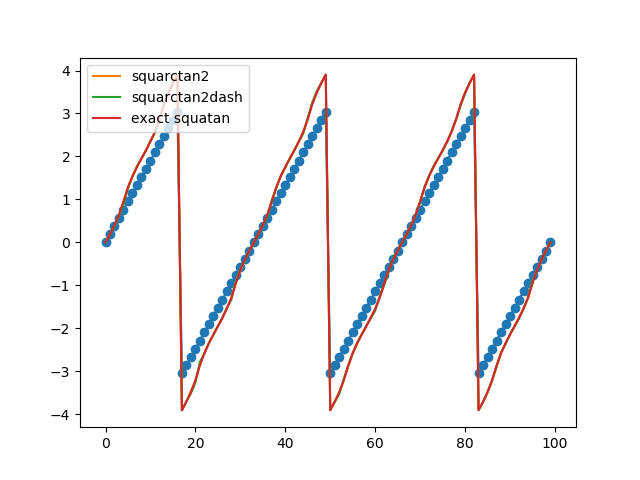

In [56]:
d = np.zeros(len(x))
e = np.zeros(len(x))
f = squatan(y,x)

for i in range(len(d)):
    d[i] = squarctan2(y[i],x[i])
    e[i] = squarctan2dash(y[i],x[i])

%matplotlib notebook
    
plt.plot(c)
plt.scatter(list(range(len(c))),c)

plt.plot(d,label="squarctan2")
plt.plot(e,label="squarctan2dash")
plt.plot(f,label="exact squatan")
plt.legend()
plt.show()
#plt.scatter(list(range(len(d))),d)

<IPython.core.display.Javascript object>


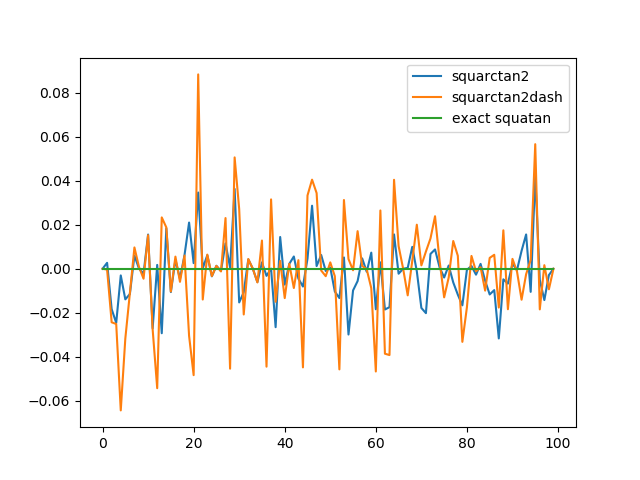

In [58]:
%matplotlib notebook
plt.plot(d-f,label="squarctan2")
plt.plot(e-f,label="squarctan2dash")
plt.plot(f-f,label="exact squatan")
plt.legend()